In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('heart_disease_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
col_names = df.columns
print(col_names)

Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal', u'num'],
      dtype='object')


In [25]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
target = df.num
features = df.drop('num', axis=1)#axis is 1 as we dropping column, for rows axis=0

features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


('Number of diseased persond', 164)
('Number of non-diseased persond', 139)


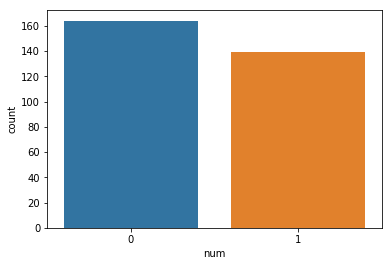

In [5]:
#check class imbalance
sns.countplot(target, label='Count')
D, N = target.value_counts()

print('Number of diseased persond', D)
print('Number of non-diseased persond', N)

In [6]:
features.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


# Plotting the standardized data

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

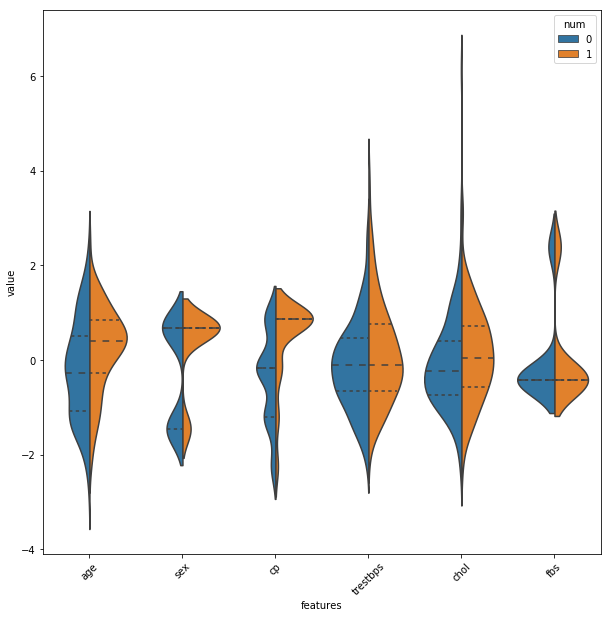

In [7]:
data = features
standardized_data = (data - data.mean()) / data.std()
data = pd.concat([target, standardized_data.iloc[:, 0:6]], axis=1)
data = pd.melt(data, id_vars='num',
              var_name='features',
              value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='value', hue='num', data=data, split=True, inner='quart')
plt.xticks(rotation=45)


As median of diease and non-disease is not seperated in 'fbs' feature so it is not predictive. 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

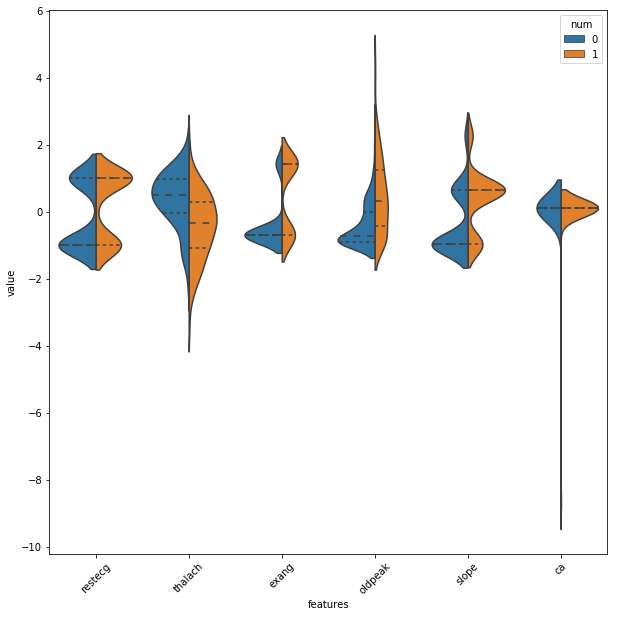

In [8]:
data = pd.concat([target, standardized_data.iloc[:, 6:12]], axis=1)
data = pd.melt(data, id_vars='num',
              var_name='features',
              value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x='features', y='value', hue='num', data=data, split=True, inner='quart')
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

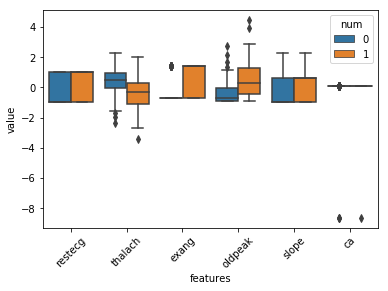

In [9]:
sns.boxplot(x='features', y='value', hue='num', data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

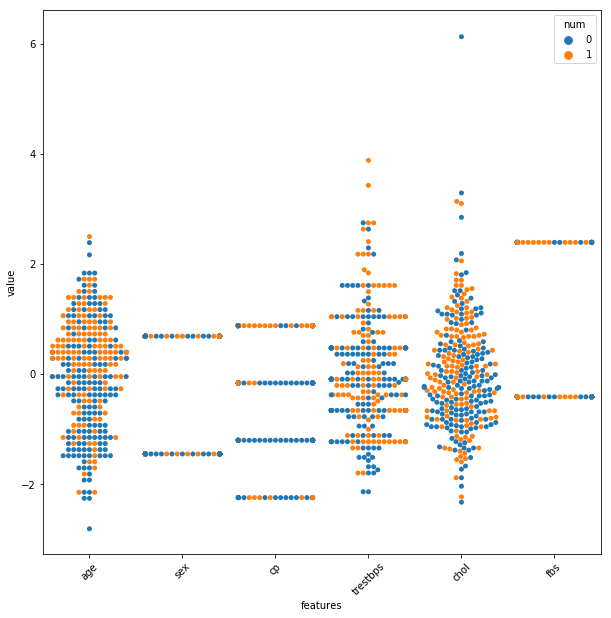

In [10]:
data = features
standardized_data = (data - data.mean()) / data.std()
data = pd.concat([target, standardized_data.iloc[:, 0:6]], axis=1)
data = pd.melt(data, id_vars='num',
              var_name='features',
              value_name='value')
plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='value', hue='num', data=data)
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

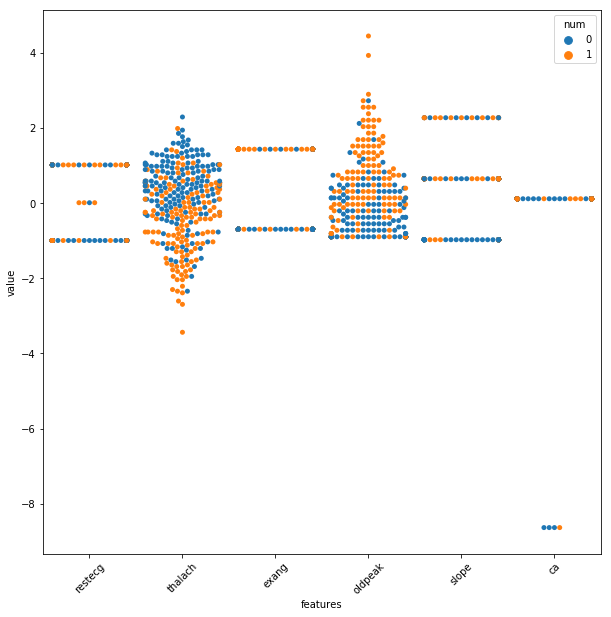

In [11]:
data = features
standardized_data = (data - data.mean()) / data.std()
data = pd.concat([target, standardized_data.iloc[:, 6:12]], axis=1)
data = pd.melt(data, id_vars='num',
              var_name='features',
              value_name='value')
plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='value', hue='num', data=data)
plt.xticks(rotation=45)


# Checking features corelation

From violin plot it is noted that two features 'chol' and 'trestbps' are correlated

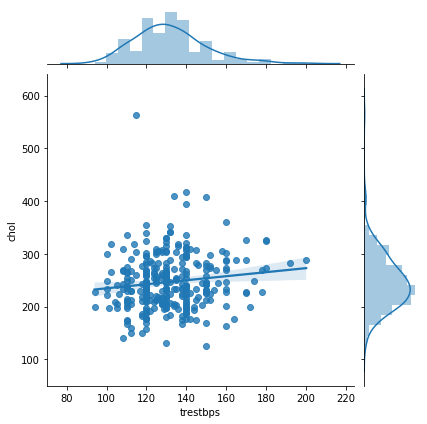

In [12]:
sns.jointplot(features.loc[:, 'trestbps'],
             features.loc[:, 'chol'],
             kind='regg')

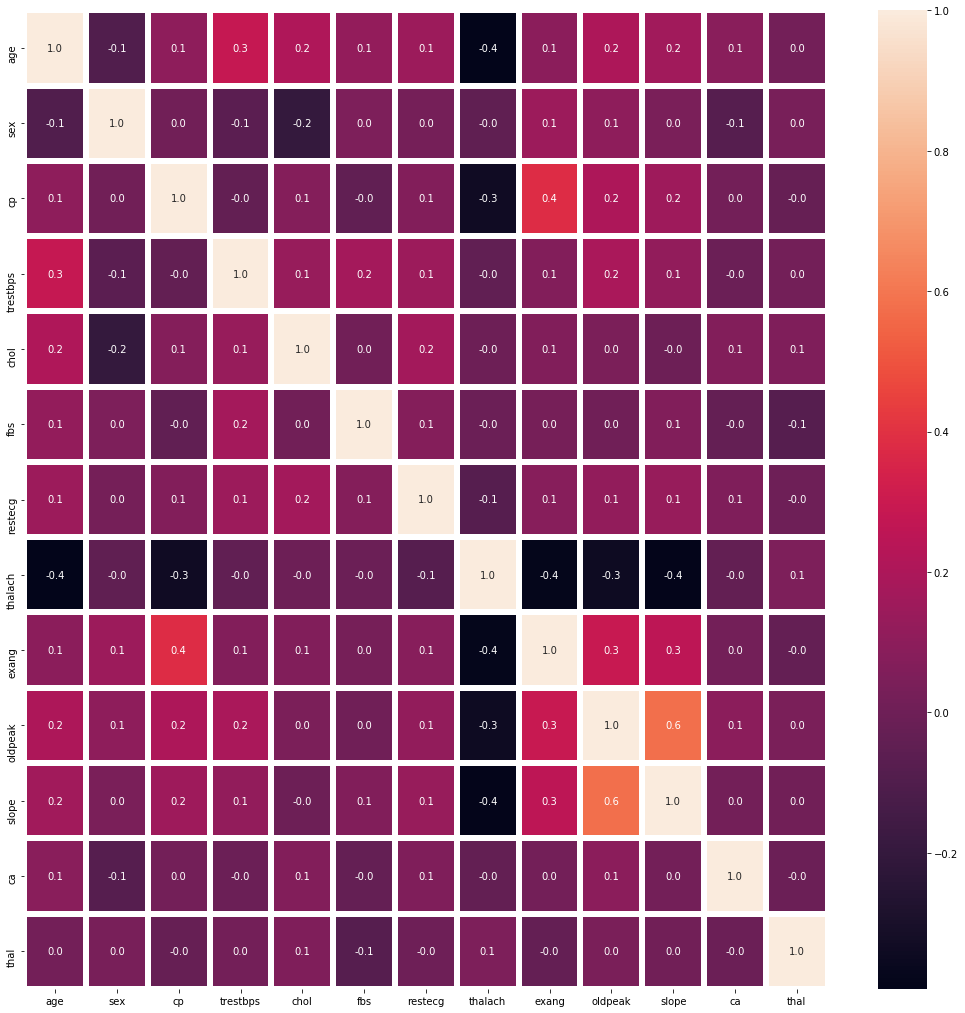

In [13]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(features.corr(), annot=True, linewidth=5, fmt='.1f', ax=ax)#drop columns which have correlation 1

# Classification

In [14]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=.3, 
                                                                            random_state=42)
model = xgb.XGBClassifier(random_state=42)
model = model.fit(features_train, target_train)

('Accuracy ', 0.8241758241758241)


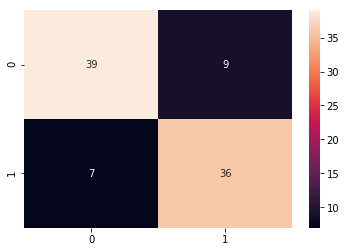

In [16]:
print('Accuracy ', accuracy_score(target_test, model.predict(features_test)))
conf_mat = confusion_matrix(target_test, model.predict(features_test))
sns.heatmap(conf_mat, annot=True, fmt='d')

# Feature Selection

In [17]:
#univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [18]:
best_features = SelectKBest(f_classif, k=6).fit(features_train, target_train)

print('list of scores ', best_features.scores_)
print('list of features is ', features_train.columns)

('list of scores ', array([1.71865112e+01, 2.26833130e+01, 3.36830444e+01, 6.14855758e+00,
       3.33437229e+00, 8.72344666e-01, 5.86985658e+00, 3.58483621e+01,
       5.27730946e+01, 3.86789128e+01, 2.00654367e+01, 1.67017262e+00,
       1.75847726e-02]))
('list of features is ', Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal'],
      dtype='object'))


In [19]:
#principle component analysis (dimensionally reduction)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

features_train_norm = (features_train - features_train.mean()) / (features_train.max() - features_train.min())
features_test_norm = (features_test - features_test.mean()) / (features_test.max() - features_test.min())


Text(0,0.5,'varience')

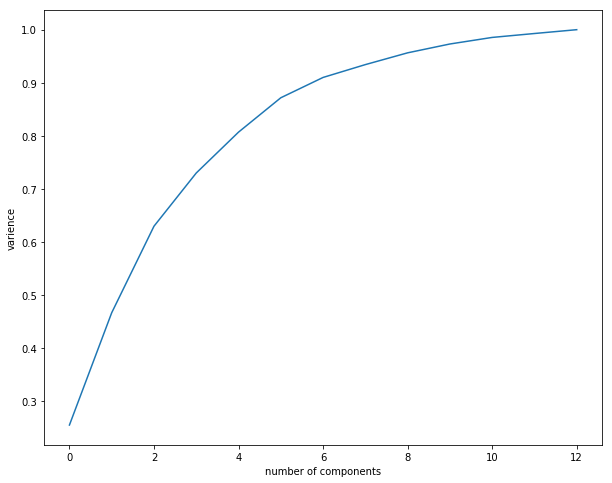

In [20]:
from sklearn.decomposition import PCA

pca = PCA().fit(features_train_norm)

plt.figure(1, figsize=(10, 8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('varience')


/home/umar/my_project_dir/my_project_env/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08261179 0.05448629 0.12603683 0.06483565 0.06176373 0.01540248
 0.02988277 0.07360678 0.12911649 0.08669571 0.08369612 0.11086104
 0.08100432]


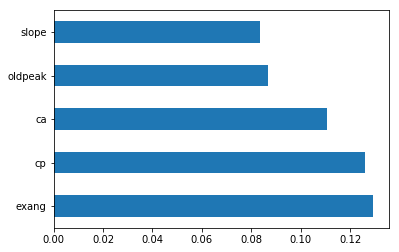

In [21]:
# feature importence values
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()